In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [26]:
# Base directory
BASE_DIR = Path().resolve().parents[1]
INPUT_PATH = BASE_DIR / "data" / "processed" / "Final_CO2_Emissions_Dataset.csv"

In [9]:
# Set plot style
sns.set(style="whitegrid", context="talk")

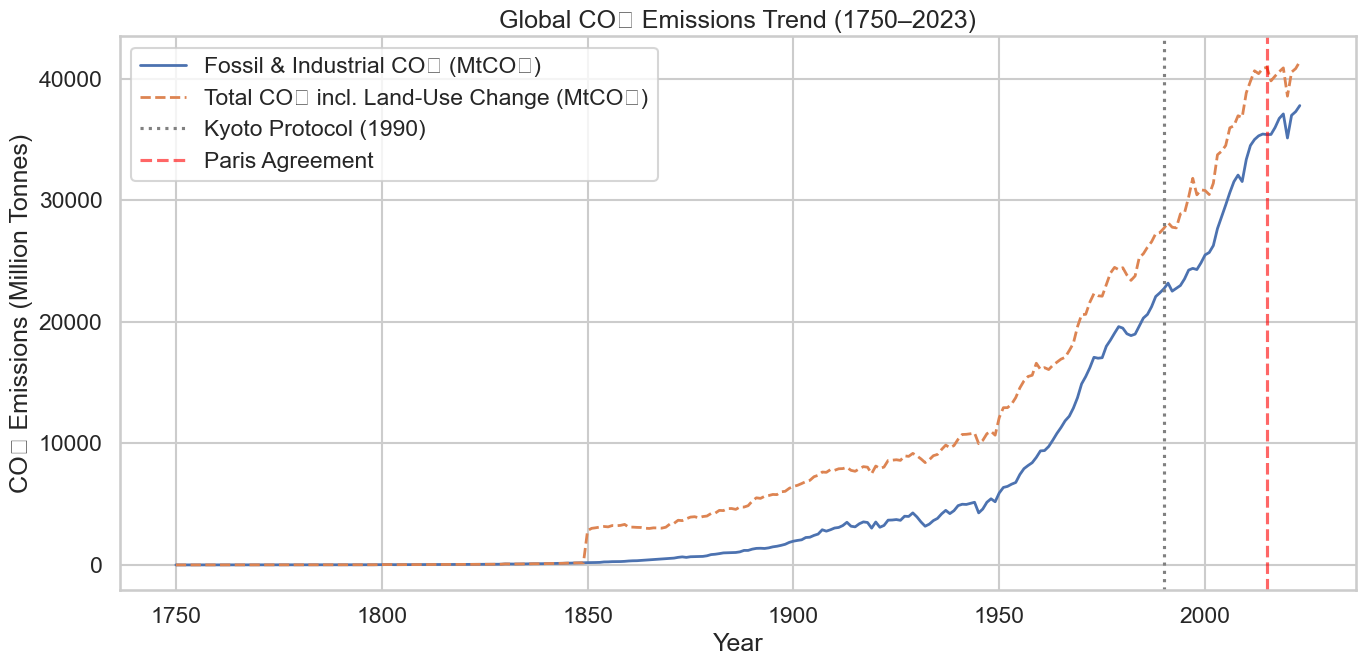

In [10]:
# Analysis 1

# Load and clean data
df = pd.read_csv(INPUT_PATH)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)

# Filter WORLD data
df_world = df[df['country'].str.upper() == 'WORLD'].copy()

# Convert and clean relevant columns
df_world['co2'] = pd.to_numeric(df_world['co2'], errors='coerce').fillna(0)
df_world['land_use_change_co2'] = pd.to_numeric(df_world['land_use_change_co2'], errors='coerce').fillna(0)

# Compute total emissions including LUC
df_world['co2_including_luc'] = df_world['co2'] + df_world['land_use_change_co2']

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df_world['year'], df_world['co2'], label='Fossil & Industrial CO₂ (MtCO₂)', linewidth=2)
plt.plot(df_world['year'], df_world['co2_including_luc'], label='Total CO₂ incl. Land-Use Change (MtCO₂)', linestyle='--', linewidth=2)

# Optional annotations
plt.axvline(x=1990, color='gray', linestyle=':', label='Kyoto Protocol (1990)')
plt.axvline(x=2015, color='red', linestyle='--', alpha=0.6, label='Paris Agreement')

plt.title("Global CO₂ Emissions Trend (1750–2023)", fontsize=18)
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.legend()
plt.tight_layout()

# show plot
plt.show()

In [11]:
# -----------------------------------------
# Analysis 2
# -----------------------------------------

# Load and clean data
df = pd.read_csv(INPUT_PATH)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)
df['co2'] = pd.to_numeric(df['co2'], errors='coerce')

# Exclude aggregates but keep Antarctica
excluded_entities = [
    'WORLD',
    'INTERNATIONAL TRANSPORT',
    'INTERNATIONAL SHIPPING',
    'INTERNATIONAL AVIATION',
    'DISPUTED'
]
df = df[~df['country'].str.upper().isin(excluded_entities)]

# Determine latest year
latest_year = df[df['co2'].notnull()]['year'].max()
df_latest = df[df['year'] == latest_year]

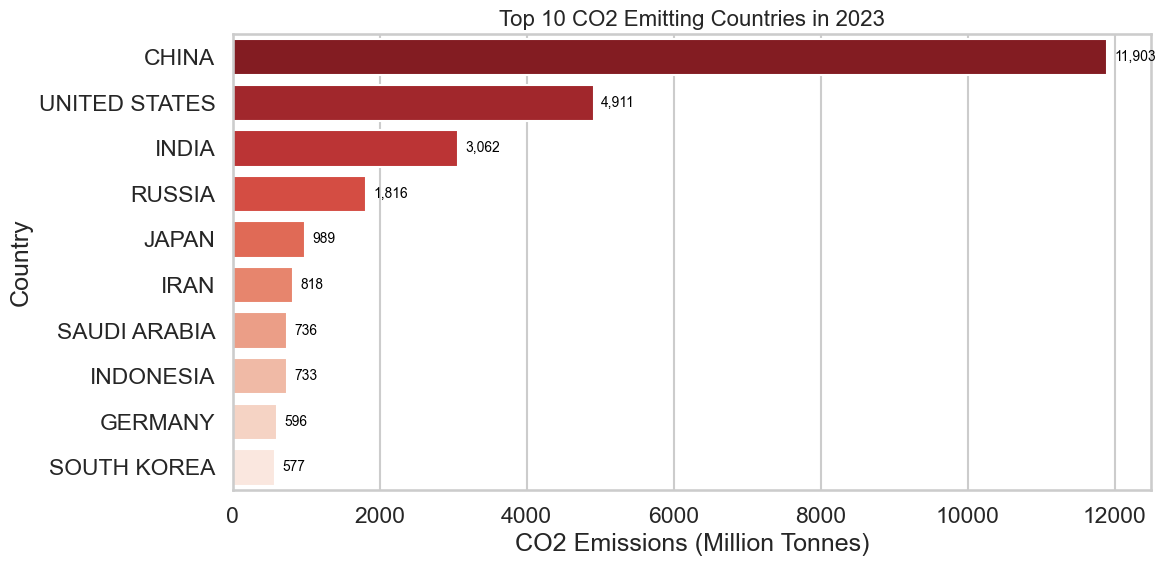

In [12]:
top_emitters = df_latest.nlargest(10, 'co2')[['country', 'co2']]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_emitters, x='co2', y='country', hue=None, palette='Reds_r', legend=False)

# Annotate bars
for i, (co2_value, country) in enumerate(zip(top_emitters['co2'], top_emitters['country'])):
    plt.text(co2_value + 100, i, f"{co2_value:,.0f}", va='center', fontsize=10, color='black')

plt.title(f"Top 10 CO2 Emitting Countries in {latest_year}", fontsize=16)
plt.xlabel("CO2 Emissions (Million Tonnes)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

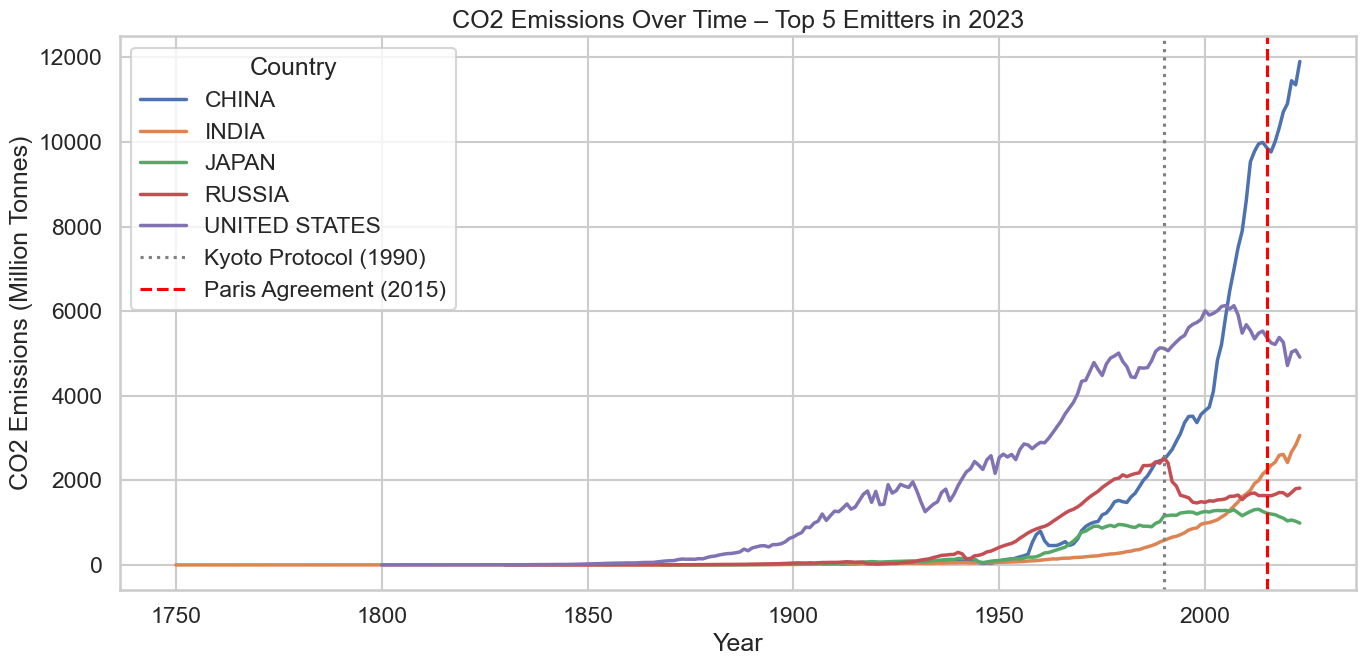

In [13]:
top5_countries = top_emitters.head(5)['country'].tolist()
df_top5_trend = df[df['country'].isin(top5_countries)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top5_trend, x='year', y='co2', hue='country', linewidth=2.5)

# Annotate policy milestones
plt.axvline(x=1990, color='gray', linestyle=':', label='Kyoto Protocol (1990)')
plt.axvline(x=2015, color='red', linestyle='--', label='Paris Agreement (2015)')

plt.title(f"CO2 Emissions Over Time – Top 5 Emitters in {latest_year}", fontsize=18)
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (Million Tonnes)")
plt.legend(title="Country")
plt.tight_layout()

# Show Plot
plt.show()


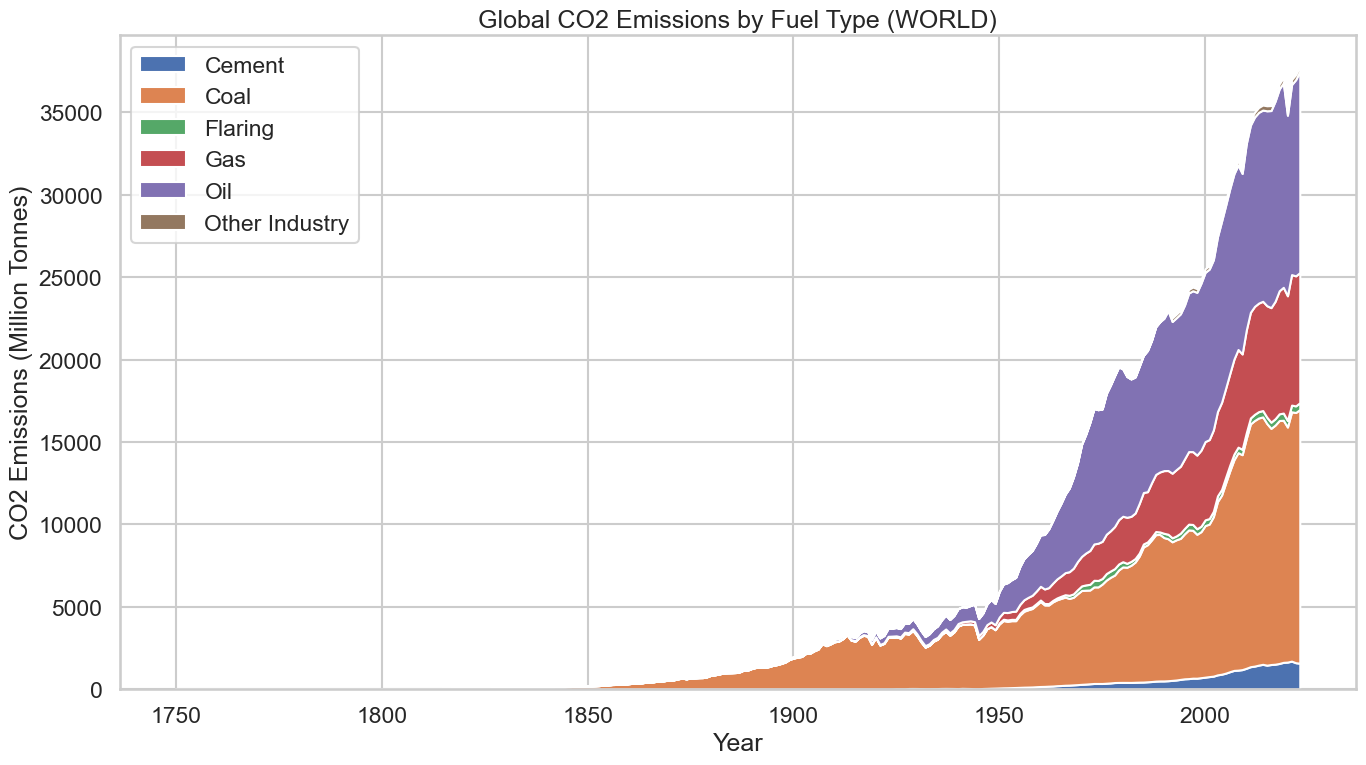

In [14]:
#Analysis 3

# Load and clean data
df = pd.read_csv(INPUT_PATH)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)
df['co2'] = pd.to_numeric(df['co2'], errors='coerce')

# Step 1: Subset WORLD data
df_world = df[df['country'].str.upper() == 'WORLD'].copy()

# Step 2: Convert fuel columns to numeric and handle NaNs
fuel_cols = ['cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2']
df_world[fuel_cols] = df_world[fuel_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# Step 3: Sort by year
df_world = df_world.sort_values('year')

# Step 4: Plot stacked area chart
plt.figure(figsize=(14, 8))
plt.stackplot(df_world['year'], 
              [df_world[col] for col in fuel_cols],
              labels=['Cement', 'Coal', 'Flaring', 'Gas', 'Oil', 'Other Industry'])

# Formatting
plt.title("Global CO2 Emissions by Fuel Type (WORLD)", fontsize=18)
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (Million Tonnes)")
plt.legend(loc="upper left")
plt.tight_layout()

# Show Plot
plt.show()

In [15]:
# Set custom color palette
colors = ['#d95f02', "#e6e46b", '#7570b3', '#e7298a', '#66a61e', '#e6ab02']

# Plot improved chart
plt.figure(figsize=(14, 8))
plt.stackplot(
    df_world['year'],
    [df_world[f'{col}_pct'] for col in fuel_cols],
    labels=['Cement', 'Coal', 'Flaring', 'Gas', 'Oil', 'Other Industry'],
    colors=colors,
    alpha=0.85
)

# Add formatting
plt.title("Share of Global CO2 Emissions by Fuel Type (WORLD)", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Percentage Share (%)")
plt.ylim(0, 100)
plt.legend(loc='upper left', title='Fuel Type', fontsize=10, title_fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()


KeyError: 'cement_co2_pct'

<Figure size 1400x800 with 0 Axes>

C:\Users\Sumukh D S\AppData\Local\Temp\ipykernel_29476\4154776277.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_luc_share, x='land_use_share', y='country', palette='YlGnBu')


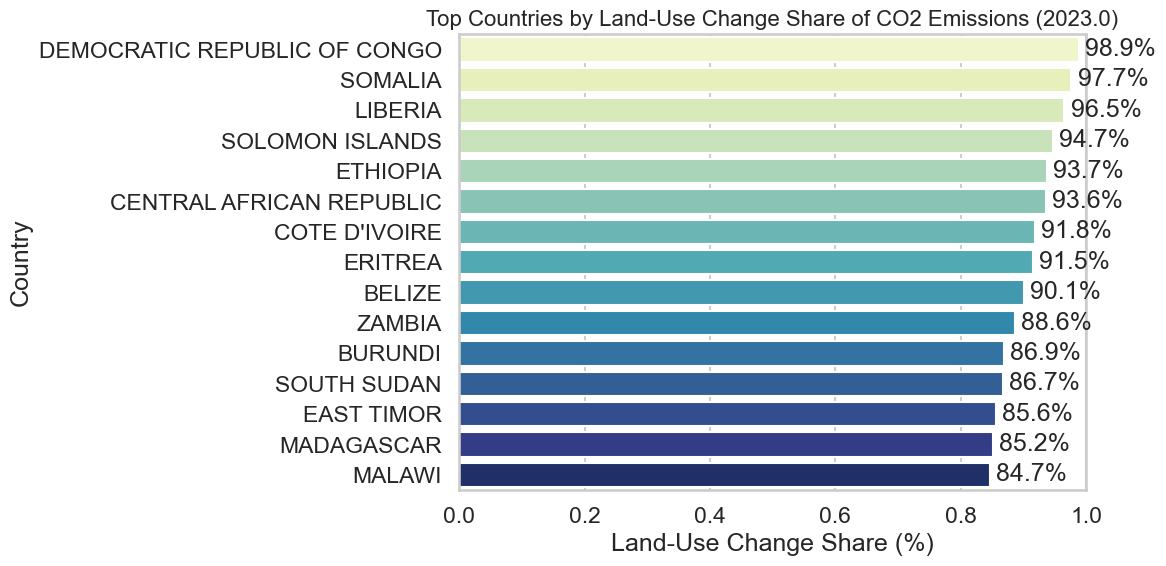

In [ ]:
# ============================================
# Analysis 4: Land-Use Change vs Fossil Fuels
# ============================================

# Step 1: Reload a clean copy of the dataset
df_luc = pd.read_csv(INPUT_PATH)

# Step 2: Clean numeric fields
df_luc['year'] = pd.to_numeric(df_luc['year'], errors='coerce')
df_luc['co2'] = pd.to_numeric(df_luc['co2'], errors='coerce').fillna(0)
df_luc['land_use_change_co2'] = pd.to_numeric(df_luc['land_use_change_co2'], errors='coerce').fillna(0)

# Step 3: Compute total and LUC share
df_luc['total_emissions'] = df_luc['co2'] + df_luc['land_use_change_co2']
df_luc = df_luc[df_luc['total_emissions'] > 0]  # remove rows with 0 total emissions
df_luc['land_use_share'] = df_luc['land_use_change_co2'] / df_luc['total_emissions']

# Step 4: Filter for latest year and remove aggregates
latest_year = df_luc['year'].max()
excluded_entities = [
    'WORLD',
    'INTERNATIONAL TRANSPORT',
    'INTERNATIONAL SHIPPING',
    'INTERNATIONAL AVIATION',
    'DISPUTED'
]
df_latest = df_luc[(df_luc['year'] == latest_year) & (~df_luc['country'].str.upper().isin(excluded_entities))]

# Step 5: Top 15 countries with highest land-use share
top_luc_share = df_latest.sort_values('land_use_share', ascending=False).head(15)

# Step 6: Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_luc_share, x='land_use_share', y='country', palette='YlGnBu')
plt.title(f"Top Countries by Land-Use Change Share of CO2 Emissions ({latest_year})", fontsize=16)
plt.xlabel("Land-Use Change Share (%)")
plt.ylabel("Country")

# Annotate % values on bars
for i, val in enumerate(top_luc_share['land_use_share']):
    plt.text(val + 0.01, i, f"{val*100:.1f}%", va='center')

plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Choropleth using already cleaned `df_luc`
fig = px.choropleth(
    df_latest,  # from previous steps in your notebook
    locations="country",
    locationmode="country names",
    color="land_use_share",
    hover_name="country",
    color_continuous_scale="YlGnBu",
    title=f"Share of CO₂ Emissions from Land-Use Change by Country ({latest_year})",
    labels={"land_use_share": "Land-Use CO₂ Share"}
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    coloraxis_colorbar=dict(title="LUC Share (%)", tickformat=".0%")
)

fig.show()

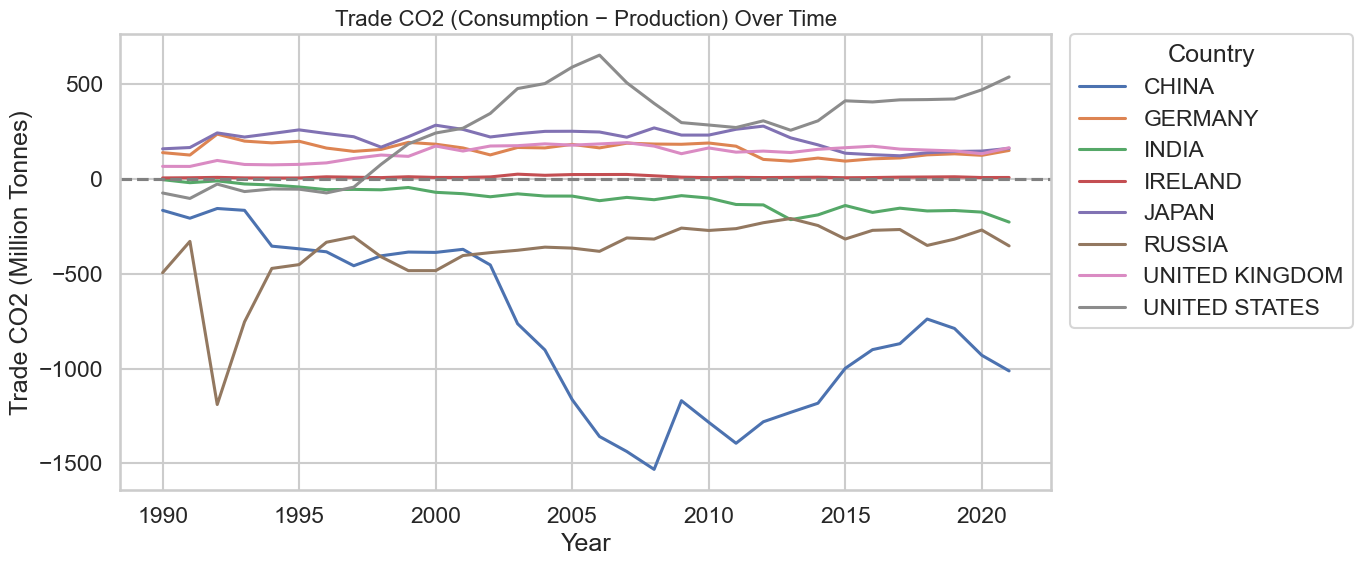

In [ ]:
# =======================================================
# Analysis 5: Production vs. Consumption Accounting
# =======================================================

# Step 1: Reload clean dataset to avoid modified df
df_trade = pd.read_csv(INPUT_PATH)

# Step 2: Clean and prepare numeric fields
df_trade['year'] = pd.to_numeric(df_trade['year'], errors='coerce')
df_trade['co2'] = pd.to_numeric(df_trade['co2'], errors='coerce')  # production-based
df_trade['consumption_co2'] = pd.to_numeric(df_trade['consumption_co2'], errors='coerce')
df_trade['trade_co2'] = pd.to_numeric(df_trade['trade_co2'], errors='coerce')

# Step 3: Filter valid rows
df_trade = df_trade.dropna(subset=['year', 'co2', 'consumption_co2', 'trade_co2'])

# Step 4: Focus on selected countries (Germany, UK, China, USA, India)
focus_countries = ['CHINA', 'UNITED STATES', 'INDIA', 'RUSSIA', 'JAPAN', 'UNITED KINGDOM', 'GERMANY', 'IRELAND']
df_focus = df_trade[df_trade['country'].isin(focus_countries)]

# Step 5: Plot Trade CO₂ over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_focus, x='year', y='trade_co2', hue='country', linewidth=2.2)

# Horizontal reference line
plt.axhline(0, color='gray', linestyle='--')

# Labels and title
plt.title("Trade CO2 (Consumption − Production) Over Time", fontsize=16)
plt.ylabel("Trade CO2 (Million Tonnes)")
plt.xlabel("Year")

# Improved legend placement (outside the plot)
plt.legend(
    title="Country",
    bbox_to_anchor=(1.02, 1),  # move legend outside right
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()

Fitting auto_arima to determine best (p,d,q)...
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=3218.092, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3289.037, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3252.638, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3245.832, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3287.146, Time=0.01 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3229.898, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3227.877, Time=0.12 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=3219.617, Time=0.23 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=3219.600, Time=0.27 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3232.586, Time=0.09 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=3227.765, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=3228.595, Time=0.16 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=3221.599, Time=0.26 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=3217.957,

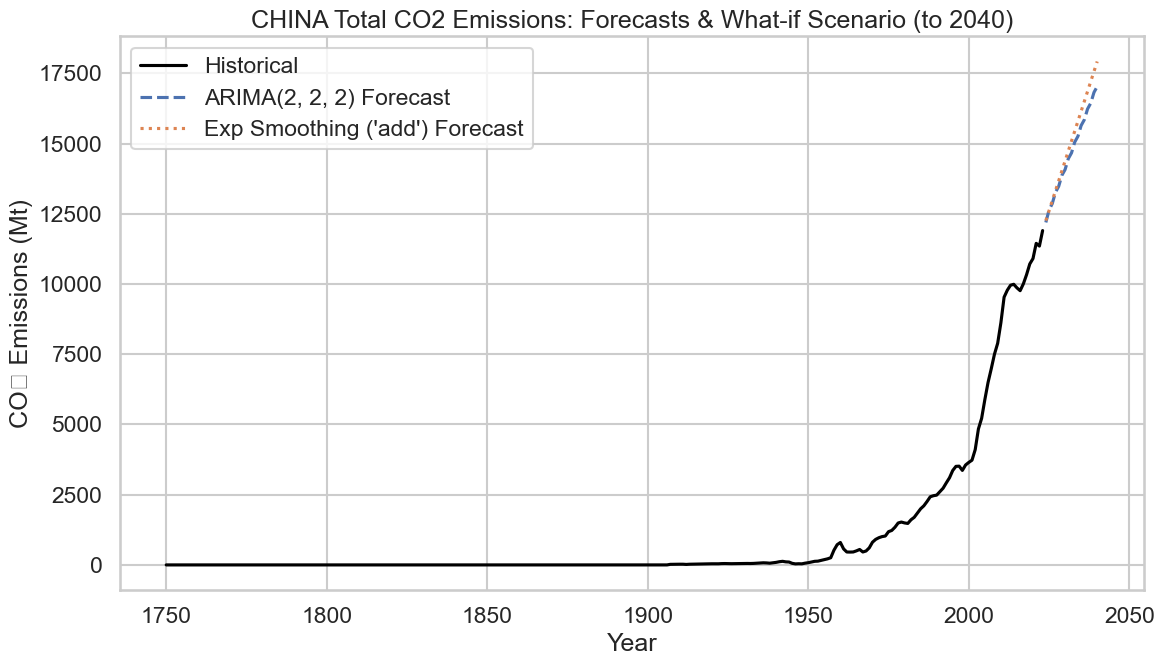


ARIMA(2, 2, 2) (AIC=3217.96) Forecasted Emissions:
  2030: 14074.24 Mt CO₂
  2040: 17032.03 Mt CO₂

Exp Smoothing ('add') (AIC=2492.01) Forecasted Emissions:
  2030: 14380.94 Mt CO₂
  2040: 17921.56 Mt CO₂


In [32]:
#Analysis 6

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

try:
    import pmdarima as pm
except ImportError:
    pm = None

warnings.filterwarnings('ignore')

# ----------- Utility Functions -----------

def load_country_series(input_path, country, emission_col):
    df = pd.read_csv(input_path)
    df_country = df[df['country'].str.strip().str.lower() == country.lower()]
    df_country = df_country.sort_values('year')
    years = df_country['year'].astype(int)
    emissions = df_country[emission_col].astype(float)
    ts = pd.Series(emissions.values, index=years)
    return ts.fillna(0)

def find_best_arima(ts):
    if pm is None:
        raise ImportError("pmdarima is not installed. Please install with `pip install pmdarima`.")
    print("Fitting auto_arima to determine best (p,d,q)...")
    arima_model = pm.auto_arima(ts, seasonal=False, trace=True,
                                error_action='ignore', suppress_warnings=True,
                                stepwise=True, max_p=4, max_q=4, max_d=2)
    print(f"Best ARIMA order: {arima_model.order} (AIC={arima_model.aic():.2f})")
    return arima_model.order, arima_model.aic()

def find_best_es_trend(ts):
    print("\nTesting different trends for Exponential Smoothing...")
    trend_options = [None, 'add', 'mul']
    best_trend = None
    best_aic = np.inf
    for trend in trend_options:
        try:
            model_es = ExponentialSmoothing(ts, trend=trend, seasonal=None)
            fit_es = model_es.fit()
            aic = fit_es.aic
            print(f"Trend: {trend}, AIC: {aic:.2f}")
            if aic < best_aic:
                best_aic = aic
                best_trend = trend
        except Exception as e:
            print(f"Trend: {trend}, Error: {e}")
    print(f"\nBest trend for Exponential Smoothing: {best_trend} (AIC={best_aic:.2f})")
    return best_trend, best_aic

def forecast_and_plot(ts, arima_order, es_trend, forecast_end_year=2040):
    forecast_years = np.arange(ts.index.max()+1, forecast_end_year+1)
    # ARIMA forecast
    model_arima = ARIMA(ts, order=arima_order)
    model_arima_fit = model_arima.fit()
    forecast_arima = model_arima_fit.forecast(steps=len(forecast_years))
    arima_aic = model_arima_fit.aic
    # Exp Smoothing forecast
    model_es = ExponentialSmoothing(ts, trend=es_trend, seasonal=None)
    model_es_fit = model_es.fit()
    forecast_es = model_es_fit.forecast(steps=len(forecast_years))
    es_aic = model_es_fit.aic
    # # What-if scenario: 50% reduction by forecast_end_year
    # last_val = ts.iloc[-1]
    # whatif_emissions = np.linspace(last_val, last_val * 0.5, len(forecast_years))

    plt.figure(figsize=(12, 7))
    plt.plot(ts, label='Historical', color='black')
    plt.plot(forecast_years, forecast_arima, label=f'ARIMA{arima_order} Forecast', linestyle='--')
    plt.plot(forecast_years, forecast_es, label=f"Exp Smoothing ('{es_trend}') Forecast", linestyle=':')
    # plt.plot(forecast_years, whatif_emissions, label='"What-if": 50% Cut by 2040', linestyle='-.')
    plt.xlabel('Year')
    plt.ylabel('CO₂ Emissions (Mt)')
    plt.title(f"{country} Total CO2 Emissions: Forecasts & What-if Scenario (to {forecast_end_year})")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"\nARIMA{arima_order} (AIC={arima_aic:.2f}) Forecasted Emissions:")
    for year in [2030, 2040]:
        idx = list(forecast_years).index(year)
        print(f"  {year}: {forecast_arima.iloc[idx]:.2f} Mt CO₂")

    print(f"\nExp Smoothing ('{es_trend}') (AIC={es_aic:.2f}) Forecasted Emissions:")
    for year in [2030, 2040]:
        idx = list(forecast_years).index(year)
        print(f"  {year}: {forecast_es.iloc[idx]:.2f} Mt CO₂")

    # print("\nWhat-if Scenario (50% reduction by 2040):")
    # for year in [2030, 2040]:
    #     idx = list(forecast_years).index(year)
    #     print(f"  {year}: {whatif_emissions[idx]:.2f} Mt CO₂")

# ----------- Main Usage -----------
country = 'CHINA'
emission_col = 'co2'

# --- Code 1: Model Selection ---
ts = load_country_series(INPUT_PATH, country, emission_col)
arima_order, arima_aic = find_best_arima(ts)
es_trend, es_aic = find_best_es_trend(ts)

print("\nSummary of Best Models:")
print(f"  Best ARIMA order: {arima_order} (AIC={arima_aic:.2f})")
print(f"  Best Exponential Smoothing trend: {es_trend} (AIC={es_aic:.2f})")

# --- Code 2: Forecasting and Plotting ---
forecast_and_plot(ts, arima_order, es_trend)